<a href="https://colab.research.google.com/github/JulianSKYOO/Projects/blob/main/(OCT_2024)%5BSklearn%26Keras%5DAbalone_predict_ring_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abalone: predict the ring age in years**

created by Sungkyun Yoo


# Overview
 This project aims to simplify the traditional process of determining abalone age by using machine learning and neural network models.

 Predicting the age of abalone from physical measurements.
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

 In order to predict the age, there would be a set of models for regression and classification tasks. In the case of classification, use the model which classifies two age groups

# Introduction

 The goal of this analysis is to build and compare different machine learning and neural network models for both regression and classification tasks. In the regression task, we predict the number of rings (representing age), while in the classification task, we categorise abalones into two groups: those younger than ten years and those ten years or older. Before building the models, we performed data processing, analysis, and visualisations to discuss major observations between the measurements.

# Data
Dataset usage: Abalone

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years (ring-age)

Ignore the +1.5 in ring-age and use the raw data

Source: https://archive.ics.uci.edu/ml/datasets/abalone

# Code

##Installing the ucimlrepo package

In [ ]:
!pip uninstall ucimlrepo
!pip install ucimlrepo

Found existing installation: ucimlrepo 0.0.7
Uninstalling ucimlrepo-0.0.7:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/ucimlrepo-0.0.7.dist-info/*
    /usr/local/lib/python3.10/dist-packages/ucimlrepo/*
Proceed (Y/n)? n


## Necessary Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
from keras.optimizers import SGD

## Data Initialisation

In [ ]:
abalone = fetch_ucirepo(id=1)

# data
X = pd.DataFrame(abalone.data.features)
y = pd.DataFrame(abalone.data.targets)

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

## Define a function for processing the data

In [ ]:
# Process data
def process_data(df, model_type, normalize, test_size, i):

    # Create classification target, Age group below 10 and above 10
    df['Age_group'] = (df['Rings'] >= 10).astype(int)

    # Train test split
    X = df.drop(['Rings', 'Age_group'], axis=1)
    y_regression = df['Rings']
    y_classification = df['Age_group']

    # Normalize
    if  (normalize == True):
        transformer = Normalizer().fit(X)
        X = transformer.transform(X)

    if (model_type == 'Linear'):
        X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=test_size, random_state=i)

    elif (model_type == 'Logistic'):
        X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=test_size, random_state=i)

    else:
        sys.exit("model_type error")


    return X_train, X_test, y_train, y_test

* From the abalone data imported from ucirepo, I can decide how to pre-process the data usable for the machine to learn.
* One of the feature transformation methods, I will decide whether I want the explanatory variables to be normalized or not.


$$X_{i, Norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$


* We cannot make any assumptions about the distribution of the underlying data, Normlization function can be used.

## Visualisation for Regression models

In [ ]:
def reg_viz(df, model_type, normalize, test_size, i):

    X_train, X_test, y_train, y_test = process_data(df, model_type, normalize, test_size, i)

    if (model_type == 'Linear'):
        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Scatter plot for Linear regression
        plt.figure()
        plt.scatter(y_test, y_pred, alpha=0.5)
        range_min = min(y_test.min(), y_pred.min(), 0)
        range_max = max(y_test.max(), y_pred.max())
        plt.plot([range_min, range_max], [range_min, range_max], 'r--', lw=2)
        plt.xlabel("Actual values")
        plt.ylabel("Predicted values")
        plt.title(f"Scatter plot of Linear Reg Model_no_{i}")
        plt.savefig(f"Scatter_Linear_Reg_model_no_{i}.png")
        #plt.clf()

    elif (model_type == 'Logistic'):
        model = LogisticRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Confusion Matrix Display
        print("\n")
        print(f"Confusion Matrix for Logistic Reg model {i}")
        cm = confusion_matrix(y_pred, y_test)
        plt.figure()
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(values_format=' ')
        plt.savefig(f"Confusion_Matrix_Log_model_{i}.png")
        #plt.clf()


        # ROC Curve plot
        print("\n")
        auc = roc_auc_score(y_test, y_pred, average=None)
        y_pred_proba = model.predict_proba(X_test)[:, -1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve of AUC = {auc:.6f}")
        plt.plot([0, 1], [0, 1], 'r--', label='Random Cls')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curve for Logistic Reg model {i}")
        plt.legend(loc='lower right')
        plt.savefig(f"ROC_Curve_Logistic_Regression_{i}.png")
        #plt.clf() # Take out this to see the graph

    else:
        sys.exit("model_type error")



## Linear Regression Model

In [ ]:
# Linear Regression
def lin_reg(X_train, X_test, y_train, y_test, i):

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return  rmse, r2, model.coef_

## Linear Regression with given no. of experiements

In [ ]:
# Linear Regression Model with the given number of experiments
def run_lin_reg(df, model_type, normalize, test_size, no_exp):

    rmse_list = np.zeros(no_exp)
    r2_list = np.zeros(no_exp)

    best_r2 = float('-inf')
    best_seed = 0

    for i in range(no_exp):
        X_train, X_test, y_train_reg, y_test_reg = process_data(df, model_type, normalize, test_size, i)
        rmse, r2, coef = lin_reg(X_train, X_test, y_train_reg, y_test_reg, i)

        rmse_list[i] = rmse
        r2_list[i] = r2

        if  r2 > best_r2:
            best_r2 = r2
            best_seed = i

    mean_rmse = np.mean(rmse_list)
    std_rmse = np.std(rmse_list)
    mean_r2 = np.mean(r2_list)
    std_r2 = np.std(r2_list)

    if (normalize==True):
        print(f"The result of running {no_exp + 1} experiments.")
        print("Linear Regression With normalized predictive features Result:")
        print(f"Mean of RMSE: {mean_rmse:.4f} and Std of RMSE: {std_rmse:.4f}")
        print(f"Mean of R2: {mean_r2:.4f} and Std of R2 {std_r2:.4f}")
        print(f"Seed no.{best_seed} is the best model with r2 score: {best_r2:.4f}")
        print("\n")

        # Visualisation
        reg_viz(df, model_type, normalize, test_size, best_seed)

    else:
        print(f"The result of running {no_exp + 1} experiments.")
        print("Linear Regression With not normalized predictive features Result:")
        print(f"Mean of RMSE: {mean_rmse:.4f} and Std of RMSE: {std_rmse:.4f}")
        print(f"Mean of R2: {mean_r2:.4f} and Std of R2 {std_r2:.4f}")
        print(f"Seed no.{best_seed} is the best model with r2 score: {best_r2:.4f}")

        # Visualisation
        reg_viz(df, model_type, normalize, test_size, best_seed)

## Logistic Regression Model

In [ ]:
def log_reg(X_train, X_test, y_train, y_test, type_regul):

    # No Regularisation
    if (type_regul == 0):
        model = LogisticRegression(tol=0.001, solver='saga')
    # Lasso Regularisation
    elif (type_regul == 1):
        model = LogisticRegression(penalty='l1', tol=0.001, solver='saga')
    # Ridge Regularisation
    else:
        model = LogisticRegression(penalty='l2', tol=0.001, solver='saga')

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    return  acc, auc, model.coef_

In case, there would be a possibility of implementing Regularization, it would be better to use 'saga' algorithm.

## Logistic Regression with given no. of experiements

In [ ]:
def run_log_reg(df, model_type, normalize, test_size, no_exp):

    acc_list = np.zeros(no_exp)
    auc_list = np.zeros(no_exp)

    best_acc = float('-inf')
    best_seed = 0

    for i in range(0, no_exp):

        X_train, X_test, y_train_cls, y_test_cls = process_data(df, model_type, normalize, test_size, i)
        acc, auc, coef = log_reg(X_train, X_test, y_train_cls, y_test_cls, 0) # 0 for non regularised

        acc_list[i] = acc
        auc_list[i] = auc

        if  acc > best_acc:
            best_acc = acc
            best_seed = i

    mean_acc = np.mean(acc_list)
    std_acc = np.std(acc_list)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)

    # Logistic Regression Evaluation with normalization
    if (normalize==True):
        print(f"The result of running {no_exp + 1} experiments.")
        print("Logistic Regression With normalized predictive features Result:")
        print(f"Mean of Accuracy Score: {mean_acc:.4f} and Std of Accuracy Score: {std_acc:.4f}")
        print(f"Mean of AUC: {mean_auc:.4f} and Std of AUC {std_auc:.4f}")
        print(f"Seed no.{best_seed} is the best model with accuracy score: {best_acc:.4f}")
        print("\n")

        # Visualisation
        reg_viz(df, model_type, normalize, test_size, best_seed)

    # Logistic Regression Evaluation without nomalisation
    else:
        print(f"The result of running {no_exp + 1} experiments.")
        print("Logistic Regression With not normalized predictive features Result:")
        print(f"Mean of Accuracy Score: {mean_acc:.4f} and Std of Accuracy Score: {std_acc:.4f}")
        print(f"Mean of AUC: {mean_auc:.4f} and Std of AUC {std_auc:.4f}")
        print(f"Seed no.{best_seed} is the best model with accuracy score: {best_acc:.4f}")

        # Visualisaion
        reg_viz(df, model_type, normalize, test_size, best_seed)

## Stochastic Gradient Descent MLP

In [ ]:
def scipy_nn(X_train, X_test, y_train, y_test, model_type, num_layer, hidden, learn_rate, run_num):

    # Regressor
    if  (model_type == 'Linear'):
        if (num_layer == 1): # 1 hidden layer
            nn = MLPRegressor(hidden_layer_sizes=(hidden,), random_state=run_num, max_iter=1000, solver='sgd', learning_rate_init=learn_rate)
        elif (num_layer == 2): # 2 hidden layers
            nn = MLPRegressor(hidden_layer_sizes=(hidden,hidden), random_state=run_num, max_iter=1000, solver='sgd', learning_rate='constant', learning_rate_init=learn_rate)
        else:
            sys.exit("Not appropriate number of layers")

        nn.fit(X_train,y_train)

        y_pred_train = nn.predict(X_train)
        y_pred_test = nn.predict(X_test)

        # RMSE
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        # R2
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)

        # Plotting residuals
        #plt.figure()
        #residuals = y_test - y_pred_test
        #sns.regplot(x=residuals, y=y_pred_test, data=None, scatter=True, color='red')
        #plt.savefig(f"residual_plot_for_lr_{learn_rate}_hidd_{hidden}.png")
        #plt.clf()

        return  rmse_test, r2_test

    # Classifier
    elif  (model_type == 'Logistic'):
        if (num_layer == 1): # 1 hidden layer
            nn = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=run_num, max_iter=1000, solver='sgd', learning_rate_init=learn_rate)
        elif (num_layer == 2): # 2 hidden layers
            nn = MLPClassifier(hidden_layer_sizes=(hidden,hidden), random_state=run_num, max_iter=1000, solver='sgd', learning_rate='constant', learning_rate_init=learn_rate)
        else:
            sys.exit("Not approriate number of layers")

        nn.fit(X_train, y_train)

        y_pred_train = nn.predict(X_train)
        y_pred_test = nn.predict(X_test)

        # Accuracy Score
        acc_test = accuracy_score(y_test, y_pred_test)
        acc_train = accuracy_score(y_train, y_pred_train)
        # AUC Score
        auc_test = roc_auc_score(y_test, y_pred_test)
        auc_train = roc_auc_score(y_train, y_pred_train)

        cm = confusion_matrix(y_pred_test, y_test)
        # print(cm, 'is confusion matrix')

        return  acc_test, auc_test

    else:
        sys.exit("Not appropriate model type")


## SGD NN Multilayer Regressor model with given no. of experiments

In [ ]:
def run_nn_lin(df, model_type, normalize, min_hidden, max_hidden, hidden_step, min_lr, max_lr, lr_step, test_size, seed, no_exp):

    if (model_type == 'Linear'):
        X_train, X_test, y_train_reg, y_test_reg = process_data(df, model_type, normalize, test_size, seed)

    elif (model_type == 'Logistic'):
        X_train, X_test, y_train_cls, y_test_cls = process_data(df, model_type, normalize, test_size, seed)

    else:
        sys.exit("model_type error")

    # Regressor
    rmse_list = np.zeros(no_exp)
    r2_list = np.zeros(no_exp)

    # 2 hidden layers
    rmse2_list = np.zeros(no_exp)
    r22_list = np.zeros(no_exp)

    best_r2 = float('-inf')
    best_learn_rate = 0
    best_hidden_node = 0

    # Hyperparameter Tuning
    learn_rate_vec = np.arange(min_lr, max_lr, lr_step)
    hidden_vec = np.arange(min_hidden, max_hidden, hidden_step)

    for learn_rate in learn_rate_vec:
        print(f"learning rate: {learn_rate}")

        for hidden in hidden_vec:
            print(f"hidden node: {hidden}")

            for i in range(0, no_exp):
                rmse, r2 = scipy_nn(X_train, X_test, y_train_reg, y_test_reg, model_type, 1, hidden, learn_rate, i)
                rmse2, r22 = scipy_nn(X_train, X_test, y_train_reg, y_test_reg, model_type, 2, hidden, learn_rate, i)

                rmse_list[i] = rmse
                r2_list[i] = r2
                rmse2_list[i] = rmse2
                r22_list[i] = r22

                if  r2 > best_r2:
                    best_r2 = r2
                    best_learn_rate = learn_rate
                    best_hidden_node = hidden

            mean_rmse = np.mean(rmse_list)
            mean_r2 = np.mean(r2_list)
            mean_rmse_2 = np.mean(rmse2_list)
            mean_r2_2 = np.mean(r22_list)

            print(f"mean of RMSE : {mean_rmse:.4f}")
            print(f"mean of R2 : {mean_r2:.4f}")
            print(f"mean of RMSE with 2 hidden layers : {mean_rmse_2:.4f}")
            print(f"mean of R2 with 2 hidden layers : {mean_r2_2:.4f}")

    print(f"learn_rate: {best_learn_rate} and number of hidden nodes: {best_hidden_node} gives the best r2: {best_r2:.6f}")

## SGD NN Multilayer Classifier model with given no. of experiments

In [ ]:
def run_nn_log(df, model_type, normalize, min_hidden, max_hidden, hidden_step, min_lr, max_lr, lr_step, test_size, seed, no_exp):

    if (model_type == 'Linear'):
        X_train, X_test, y_train_reg, y_test_reg = process_data(df, model_type, normalize, test_size, seed)

    elif (model_type == 'Logistic'):
        X_train, X_test, y_train_cls, y_test_cls = process_data(df, model_type, normalize, test_size, seed)

    else:
        sys.exit("model_type error")


    # Classifier
    acc_list = np.zeros(no_exp)
    auc_list = np.zeros(no_exp)

    acc_2_list = np.zeros(no_exp) # 2 hidden layers
    auc_2_list = np.zeros(no_exp) # 2 hidden layers

    best_acc_2 = float('-inf')
    best_learn_rate = 0
    best_hidden_node = 0

    # Hyperparameter Tuning
    learn_rate_vec = np.arange(min_lr, max_lr, lr_step)
    hidden_vec = np.arange(min_hidden, max_hidden, hidden_step)

    for learn_rate in learn_rate_vec:
        print(f"learning rate: {learn_rate}")

        for hidden in hidden_vec:
            print(f"hidden node: {hidden}")

            for i in range(0, no_exp):
                acc, auc = scipy_nn(X_train, X_test, y_train_cls, y_test_cls, model_type, 1, hidden, learn_rate, i)
                acc2, auc2 = scipy_nn(X_train, X_test, y_train_cls, y_test_cls, model_type, 2, hidden, learn_rate, i)

                acc_list[i] = acc
                auc_list[i] = auc
                acc_2_list[i] = acc2
                auc_2_list[i] = auc2

                if  acc2 > best_acc_2:
                    best_acc_2 = acc2
                    best_learn_rate = learn_rate
                    best_hidden_node = hidden

            mean_acc = np.mean(acc_list)
            mean_auc = np.mean(auc_list)
            mean_acc_2 = np.mean(acc_2_list)
            mean_auc_2 = np.mean(auc_2_list)

            print(f"mean of Accuracy : {mean_acc:.4f}")
            print(f"mean of AUC : {mean_auc:.4f}")
            print(f"mean of Accuracy with 2 hidden layers : {mean_acc_2:.4f}")
            print(f"mean of AUC with 2 hidden layers : {mean_auc_2:.4f}")

    print(f"learn_rate: {best_learn_rate} and number of hidden nodes: {best_hidden_node} gives the best acc with 2 hidden layers: {best_acc_2:.6f}")

## Stochastic Gradient Descent Keras Regression

In [ ]:
def keras_lin(X_train, X_test, y_train, y_test, model_type, num_layer, hidden, learn_rate):

    # Keras model on its own ensures that every run begins with differnt inital weights
    # So the seed number is not needed.


    timesteps = 7
    steps_ahead = 7

    outputs = 7

    # Keras SGD Regression
    if (model_type == 'Linear'):
        if (num_layer == 1): # 1 hidden layer
            model = Sequential()
            model.add(Dense(hidden, input_dim=timesteps, activation='linear')) # Linear activation function
            model.add(Dense(outputs, activation='linear'))
            # Loss function: Mean Squared Error for Regression model
            model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=learn_rate), metrics=['r2_score'])

        elif (num_layer == 2):
            model = Sequential()
            model.add(Dense(hidden, input_dim=timesteps, activation='linear'))
            model.add(Dense(steps_ahead, activation='linear'))
            model.add(Dense(outputs, activation='linear'))
            model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=learn_rate), metrics=['r2_score'])

        elif (num_layer == 3):
            model = Sequential()
            model.add(Dense(hidden, input_dim=timesteps, activation='linear'))
            model.add(Dense(steps_ahead, activation='linear'))
            model.add(Dense(steps_ahead, activation='linear'))
            model.add(Dense(outputs, activation='linear'))
            model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=learn_rate), metrics=['r2_score'])

        else:
            sys.exit("number of hidden layers error")


        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, verbose=0)

        _, r2_train = model.evaluate(X_train, y_train, verbose=0)
        _, r2_test = model.evaluate(X_test, y_test, verbose=0)

        # Plot the history
        plt.figure()
        plt.plot(history.history['r2_score'], label='train')
        plt.plot(history.history['val_r2_score'], label='test')
        plt.legend()
        plt.savefig("keras_bin_reg_hidden"+str(num_layer)+"model.png")
        plt.clf()

        return r2_test


## Stochastic Gradient Descent Keras Classification

In [ ]:
def keras_log(X_train, X_test, y_train, y_test, model_type, num_layer, hidden, learn_rate):

    # Keras model on its own ensures that every run begins with differnt inital weights
    # So the seed number is not needed.

    outputs = 1

    # Keras SGD Classification
    if (model_type == 'Logistic'):
        if (num_layer == 1): # 1 hidden layer
            model = Sequential()
            model.add(Dense(hidden, input_dim=X_train.shape[1], activation='relu')) # Rectified Linear Units
            model.add(Dense(outputs, activation='sigmoid')) # Sigmoid function
            # Loss function: Binary cross entropy since the target is binary classification
            model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=learn_rate), metrics=['accuracy'])

        elif (num_layer == 2):
            model = Sequential()
            model.add(Dense(hidden, input_dim=X_train.shape[1], activation='relu'))
            model.add(Dense(hidden, activation='sigmoid'))
            model.add(Dense(outputs, activation='sigmoid'))
            model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=learn_rate), metrics=['accuracy'])

        elif (num_layer == 3):
            model = Sequential()
            model.add(Dense(hidden, input_dim=X_train.shape[1], activation='relu'))
            model.add(Dense(hidden, activation='sigmoid'))
            model.add(Dense(hidden, activation='sigmoid'))
            model.add(Dense(outputs, activation='sigmoid'))
            model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=learn_rate), metrics=['accuracy'])

        else:
            sys.exit("number of hidden layers error")

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, verbose=0)

        _, acc_train = model.evaluate(X_train, y_train, verbose=0)
        _, acc_test = model.evaluate(X_test, y_test, verbose=0)

        # Plot the history
        plt.figure()
        plt.plot(history.history['accuracy'], label='train')
        plt.plot(history.history['val_accuracy'], label='test')
        plt.legend()
        plt.savefig("keras_bin_cls_hidden"+str(num_layer)+"model.png")
        plt.clf()

        return acc_test

## SGD Keras Regression model with given no. of experiments

In [ ]:
def run_keras_lin(df, model_type, normalize, min_hidden, max_hidden, hidden_step, min_lr, max_lr, lr_step, test_size, seed, no_exp):

    if (model_type == 'Linear'):
        X_train, X_test, y_train_reg, y_test_reg = process_data(df, model_type, normalize, test_size, seed)

    elif (model_type == 'Logistic'):
        X_train, X_test, y_train_cls, y_test_cls = process_data(df, model_type, normalize, test_size, seed)

    else:
        sys.exit("model_type error")

    # Regressor
    r2_list = np.zeros(no_exp)
    r22_list = np.zeros(no_exp) # 2 hidden layers
    #r23_list = np.zeros(no_exp) # 3 hidden layers

    best_r2 = float('-inf')
    best_learn_rate = 0
    best_hidden_node = 0

    # Hyperparameter Tuning
    learn_rate_vec = np.arange(min_lr, max_lr, lr_step)
    hidden_vec = np.arange(min_hidden, max_hidden, hidden_step)

    for learn_rate in learn_rate_vec:
        print(f"learning rate: {learn_rate}")

        for hidden in hidden_vec:
            print(f"hidden node: {hidden}")

            for i in range(0, no_exp):
                r2 = keras_lin(X_train, X_test, y_train_reg, y_test_reg, model_type, 1, hidden, learn_rate)
                r22 = keras_lin(X_train, X_test, y_train_reg, y_test_reg, model_type, 2, hidden, learn_rate)
                #r23 = keras_nn(X_train, X_test, y_train_reg, y_test_reg, model_type, 3, hidden, learn_rate)

                r2_list[i] = r2
                r22_list[i] = r22
                #r23_list[i] =r23

                if  r2 > best_r2:
                    best_r2 = r2
                    best_learn_rate = learn_rate
                    best_hidden_node = hidden

            mean_r2 = np.mean(r2_list)
            mean_r2_2 = np.mean(r22_list)
            #mean_r2_3 = np.mean(r23_list)

            print(f"mean of R2 : {mean_r2:.4f}")
            print(f"mean of R2 with 2 hidden layers : {mean_r2_2:.4f}")
            #print(f"mean of Accuracy with 3 hidden layers : {mean_r2_3:.4f}")

    print(f"learn_rate: {best_learn_rate} and number of hidden nodes: {best_hidden_node} gives the best r2: {best_r2:.6f}")

## SGD Keras Classification model with given no. of experiments

In [ ]:
def run_keras_log(df, model_type, normalize, min_hidden, max_hidden, hidden_step, min_lr, max_lr, lr_step, test_size, seed, no_exp):

    if (model_type == 'Linear'):
        X_train, X_test, y_train_reg, y_test_reg = process_data(df, model_type, normalize, test_size, seed)

    elif (model_type == 'Logistic'):
        X_train, X_test, y_train_cls, y_test_cls = process_data(df, model_type, normalize, test_size, seed)

    else:
        sys.exit("model_type error")


    # Classifier
    acc_list = np.zeros(no_exp)
    acc_2_list = np.zeros(no_exp) # 2 hidden layers
    #acc_3_list = np.zeros(no_exp) # 3 hidden layers

    best_acc_2 = float('-inf')
    best_learn_rate = 0
    best_hidden_node = 0

    # Hyperparameter Tuning
    learn_rate_vec = np.arange(min_lr, max_lr, lr_step)
    hidden_vec = np.arange(min_hidden, max_hidden, hidden_step)

    for learn_rate in learn_rate_vec:
        print(f"learning rate: {learn_rate}")

        for hidden in hidden_vec:
            print(f"hidden node: {hidden}")

            for i in range(0, no_exp):
                acc = keras_log(X_train, X_test, y_train_cls, y_test_cls, model_type, 1, hidden, learn_rate)
                acc2 = keras_log(X_train, X_test, y_train_cls, y_test_cls, model_type, 2, hidden, learn_rate)
                #acc3 = keras_log(X_train, X_test, y_train_cls, y_test_cls, model_type, 3, hidden, learn_rate)

                acc_list[i] = acc
                acc_2_list[i] = acc2
                #acc_3_list[i] = acc3

                if  acc2 > best_acc_2:
                    best_acc_2 = acc2
                    best_learn_rate = learn_rate
                    best_hidden_node = hidden

            mean_acc = np.mean(acc_list)
            mean_acc_2 = np.mean(acc_2_list)
            #mean_acc_3 = np.mean(acc_3_list)

            print(f"mean of Accuracy : {mean_acc:.4f}")
            print(f"mean of Accuracy with 2 hidden layers : {mean_acc_2:.4f}")
            #print(f"mean of Accuracy with 3 hidden layers : {mean_acc_3:.4f}")

    print(f"learn_rate: {best_learn_rate} and number of hidden nodes: {best_hidden_node} gives the best acc with 2 hidden layers: {best_acc_2:.6f}")

## Clean Data

In [ ]:
# Retreive columns for categories
cat_col = X.select_dtypes(include=['object']).columns.tolist()

# One Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(X[cat_col])
one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_col))

# Encoded explanatory variables
df = pd.concat([one_hot_df, X], axis=1)
df = df.drop(cat_col, axis=1)

# Final dataset
df = pd.concat([df, y], axis=1)

# dataset for linear regression
lin_df = df.drop(['Sex_F','Sex_I' ,'Sex_M'], axis=1)

Why did I apply one hot encoding?
- since the categorical variable will be represented as number with data transformation, we have to ensure that the higher numerical value does not imply anything.

## Draw a Correlation Heatmap

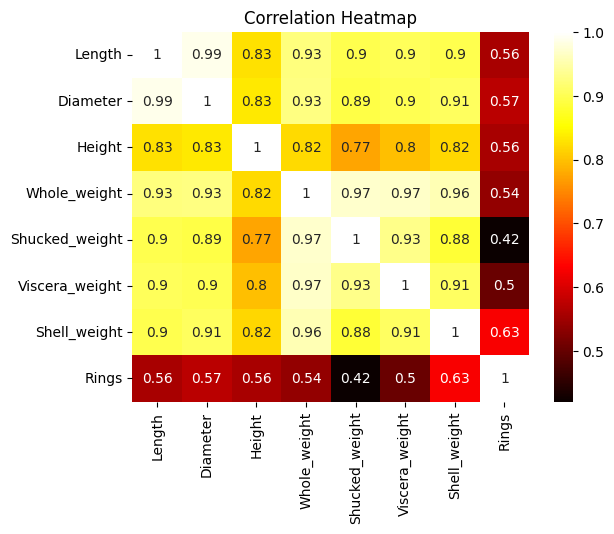

In [ ]:
# Correlation Heatmap
plt.figure()
sns.heatmap(lin_df.corr(), annot=True, cmap='hot')
plt.title('Correlation Heatmap')
plt.savefig('Correlation_Heatmap.png')
#plt.clf()

The size attributes of abalone (length, diameter, height) are strongly positively correlated to each other.
This indicates that abalones generally exhibit balanced growth across dimensions.

The mass attributes of abalone (Whole_weight, Shucked_weight, Viscera_weight, Shell_weight) are strongly positively correlated to each other.
This suggests that abalones with higher overall mass tend to have heavier individual components.

The size attributes and mass attributes are positively correlated to each other.

However, the target variable (Rings) is positively correlated to all other attributes but not relatively strong.

## Two most correlated features?

In [ ]:
# Find two most correlated features
corr_matrix = lin_df.corr()['Rings'].abs().sort_values(ascending=False)
two_features = corr_matrix.index[1:3] # exclude itself
two_features

Index(['Shell_weight', 'Diameter'], dtype='object')

## Scatter plot of the selected features

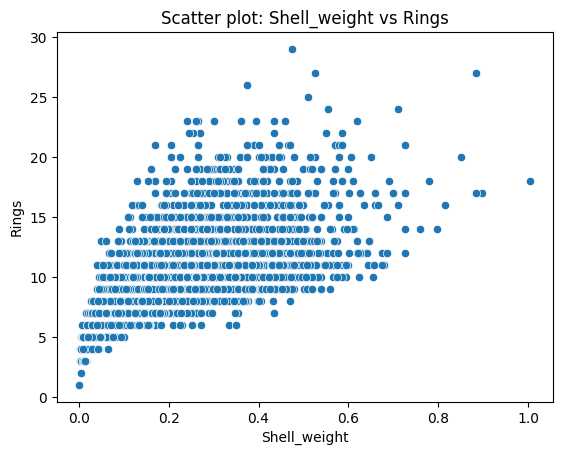

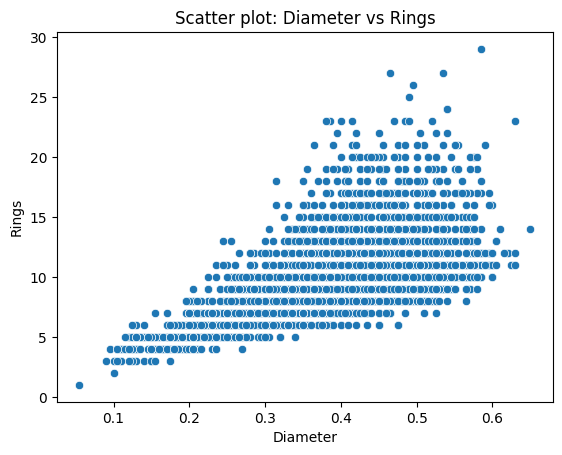

In [ ]:
# Scatter plots
for feature in two_features:
    plt.figure()
    sns.scatterplot(data=lin_df, x=feature, y='Rings')
    plt.title(f"Scatter plot: {feature} vs Rings")
    plt.savefig(f"scatter_{feature}_vs_Rings.png")
    #plt.clf()

From the scatter plots above, both two features Shell_weight and Diameter are positively correlated with Rings. The slope of Shell_weight is steeper. It can be interpreted that the Shell_weight has a stronger relationship with the Ring_Age.

## Histogram of the selected features and the target

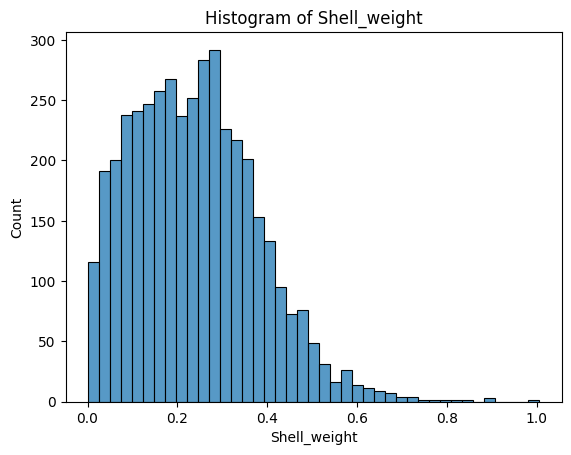

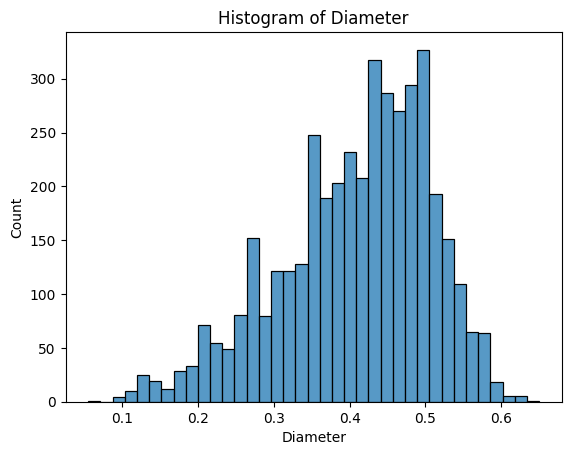

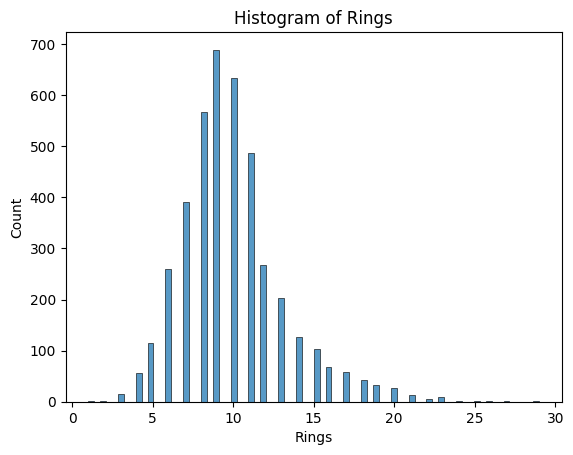

In [ ]:
# Histograms
for feature in list(two_features) + ['Rings']:
    plt.figure()
    sns.histplot(data=lin_df, x=feature)
    plt.title(f'Histogram of {feature}')
    plt.savefig(f'histogram_{feature}.png')
    #plt.clf()

The histograms shows that both Rings and Shell_weight are positively skewed and Diameter is negatively skewed

This matches the observation from the scatter plot which showed some abalones having much higher shell weight than others, resulting in the long upper tail. Additionally, the distribution seems to be centred around a shell weight of 0.30-0.35.
The right-skewed shape indicates that most abalones have lighter shells, which likely belong to younger abalones. A few outliers with very heavy shells could correspond to the older abalones in the dataset.

In [ ]:
np.mean(df['Rings'])

9.933684462532918

mean of Rings is around 9.9337, so lets set the threshold for binary classification of two age groups as 10.

## Set how many experiements we will conduct

In [ ]:
# Number of experiement - 1
no_exp = 29

## Linear Regression without Normalization

The result of running 30 experiments.
Linear Regression With not normalized predictive features Result:
Mean of RMSE: 2.2543 and Std of RMSE: 0.0518
Mean of R2: 0.5125 and Std of R2 0.0237
Seed no.12 is the best model with r2 score: 0.5543


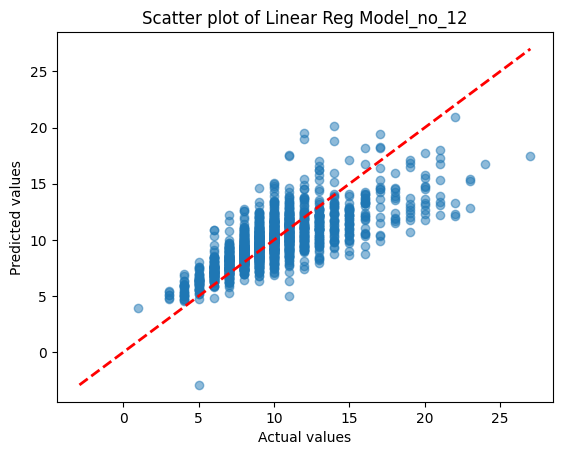

In [ ]:
# Whole dataset Wihtout Normalisation
Normalize = False
test_size = 0.4
model_type = 'Linear'
run_lin_reg(lin_df, model_type, Normalize, test_size, no_exp)

## Linear Regression with Noramlization

The result of running 30 experiments.
Linear Regression With normalized predictive features Result:
Mean of RMSE: 2.1957 and Std of RMSE: 0.0569
Mean of R2: 0.5376 and Std of R2 0.0218
Seed no.11 is the best model with r2 score: 0.5729




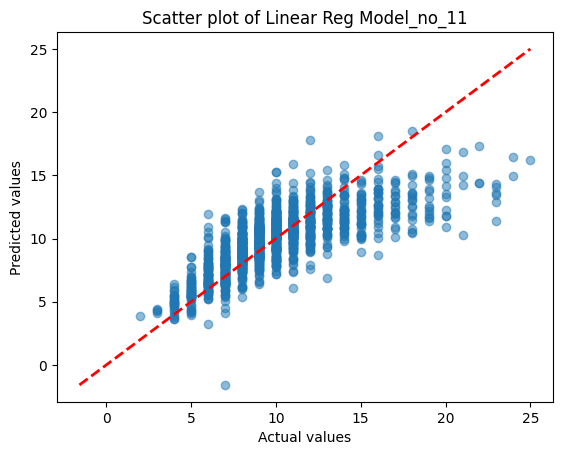

In [ ]:
# Whole dataset With Normalisation
Normalize = True
test_size = 0.4
model_type = 'Linear'
run_lin_reg(lin_df, model_type, Normalize, test_size, no_exp)

## Linear Regression for selected features

The result of running 30 experiments.
Linear Regression With normalized predictive features Result:
Mean of RMSE: 2.4124 and Std of RMSE: 0.0536
Mean of R2: 0.4422 and Std of R2 0.0149
Seed no.12 is the best model with r2 score: 0.4667




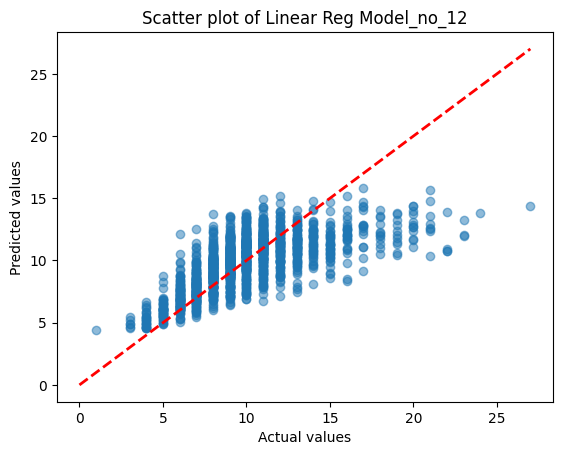

In [ ]:
# The dataset with the two most correlated features With Normalisation
Normalize = True
test_size = 0.4
model_type = 'Linear'
df_two = pd.concat([df[two_features], y], axis=1)
run_lin_reg(df_two, model_type, Normalize, test_size, no_exp)

The mean of R2 scores with Normalisation is higher than that without Normalisation. It means the model with Normalised X can explain the target y better. However, it does not mean it is a better model.

The mean of RMSE with Normalisation is closer to 0 than that without Normalisation. We can assume the model with Normalised X has a better performance.

Thoughout the experiements, the best model for Linear regression is using Normalisation, the seed 11 with r2 score 0.5729 in this dataset.

Hence, the model using Normalizer with seed 11 has around 57% of variation in the target feature is accounted for by the explanatory features.

## Logistic Regression without Normalization

The result of running 30 experiments.
Logistic Regression With not normalized predictive features Result:
Mean of Accuracy Score: 0.7677 and Std of Accuracy Score: 0.0083
Mean of AUC: 0.7678 and Std of AUC 0.0083
Seed no.21 is the best model with accuracy score: 0.7828


Confusion Matrix for Logistic Reg model 21


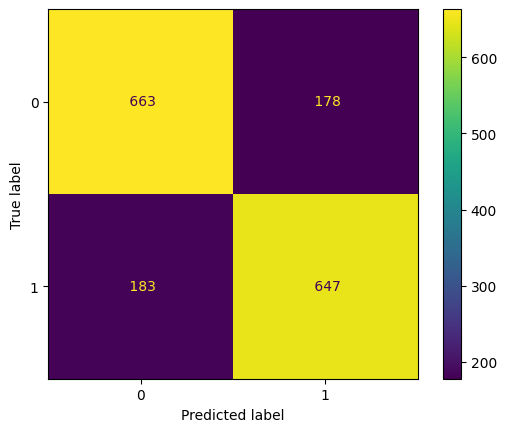

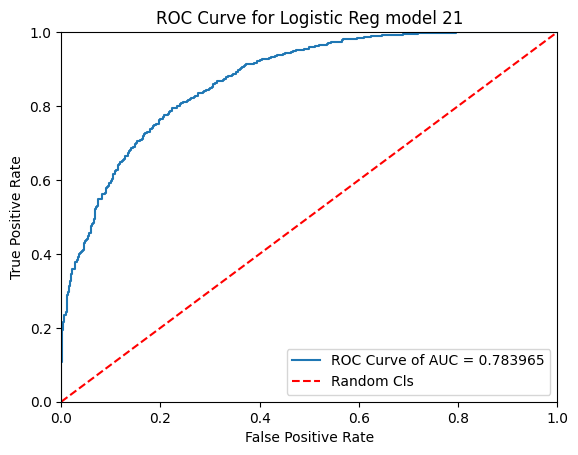

In [ ]:
# The Whole dataset Without Normalisation
Normalize = False
test_size = 0.4
model_type = 'Logistic'
run_log_reg(df, model_type, Normalize, test_size, no_exp)

## Logistic Regression with Normalization

The result of running 30 experiments.
Logistic Regression With normalized predictive features Result:
Mean of Accuracy Score: 0.7562 and Std of Accuracy Score: 0.0068
Mean of AUC: 0.7563 and Std of AUC 0.0069
Seed no.0 is the best model with accuracy score: 0.7684




Confusion Matrix for Logistic Reg model 0


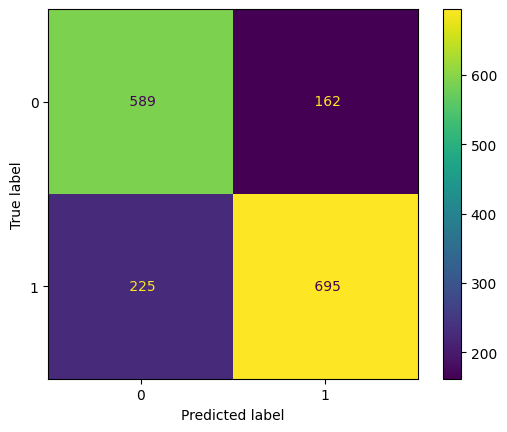

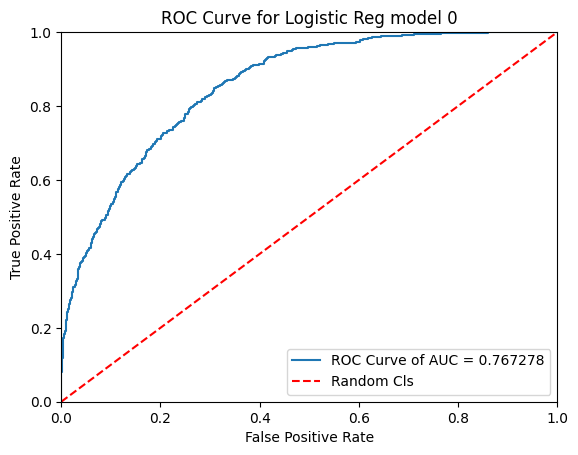

In [ ]:
# The Whole dataset With Nomarlisation
Normalize = True
test_size = 0.4
model_type = 'Logistic'
run_log_reg(df, model_type, Normalize, test_size, no_exp)

## Logistic Regression for selected features

The result of running 30 experiments.
Logistic Regression With not normalized predictive features Result:
Mean of Accuracy Score: 0.7519 and Std of Accuracy Score: 0.0073
Mean of AUC: 0.7520 and Std of AUC 0.0073
Seed no.13 is the best model with accuracy score: 0.7648


Confusion Matrix for Logistic Reg model 13


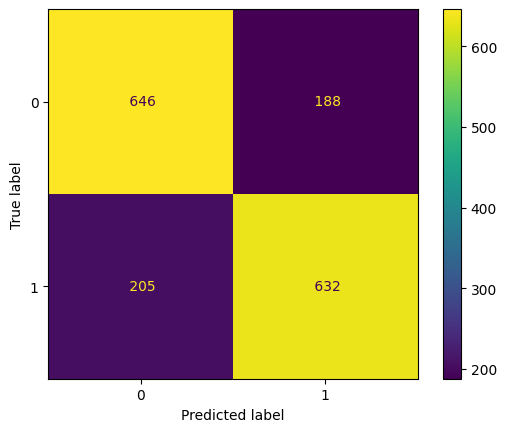

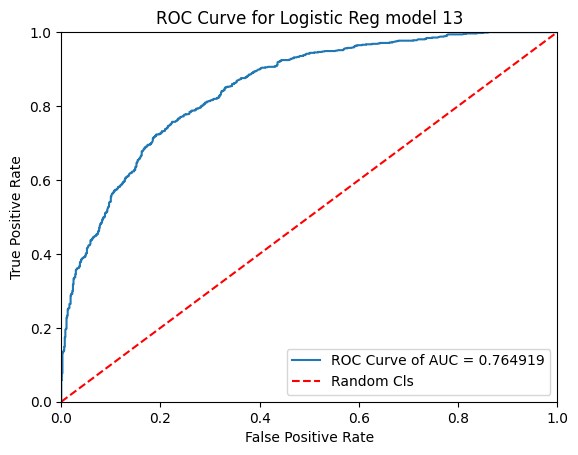

In [ ]:
# The dataset with the two most correlated features With Normalisation
Normalize = False
test_size = 0.4
model_type = 'Logistic'
df_two = pd.concat([df[two_features], y], axis=1)
run_log_reg(df_two, model_type, Normalize, test_size, no_exp)

The mean accuracy score of the model without using Normalizer is 0.0115 higher than that using Normalizer. Which means the model without Normlisation is 1.15% more accurate. However, It does not represent this model is better. Considering AUC would be needed.

The mean of AUC of the model without Normalised features is 0.0115 higher than that with Normalisation. The model without Normalisation makes a slightly better performance for classification.

Due to the metrics above, we will choose the model without Normalizer. The best model without Normalizer is when the seed is no. 21 with 78.28% of accuracy.

## Neural Network

## Stochastic Gradient Descent
Stochastic Gradient Descent algorithm randomly choose one sample to update the paramter, instead of using the entire dataset fo reach iteration. In other words, it optimises the model by minimising the errors in the predictive models.

## Multilayer Perceptron

MLP is a feedfoward neural network, consisting of multiple layers of neurons with activation functions.

## SGD MLP Regression

* Hyperparameter is optimised a bit

In [ ]:
model_type = 'Linear'
normalize = True
test_size = 0.4
seed = 11

min_hidden = 6
max_hidden = 16
hidden_step = 2
min_lr = 0.01
max_lr = 0.1
lr_step = 0.04

run_nn_lin(lin_df, model_type, normalize, min_hidden, max_hidden, hidden_step, min_lr, max_lr, lr_step, test_size, seed, no_exp)

learning rate: 0.01
hidden node: 6
mean of RMSE : 2.2908
mean of R2 : 0.4955
mean of RMSE with 2 hidden layers : 2.3046
mean of R2 with 2 hidden layers : 0.4898
hidden node: 8
mean of RMSE : 2.1147
mean of R2 : 0.5824
mean of RMSE with 2 hidden layers : 2.2168
mean of R2 with 2 hidden layers : 0.5366
hidden node: 10
mean of RMSE : 2.1107
mean of R2 : 0.5840
mean of RMSE with 2 hidden layers : 2.1668
mean of R2 with 2 hidden layers : 0.5610
hidden node: 12
mean of RMSE : 2.1151
mean of R2 : 0.5822
mean of RMSE with 2 hidden layers : 2.1637
mean of R2 with 2 hidden layers : 0.5624
hidden node: 14
mean of RMSE : 2.0996
mean of R2 : 0.5884
mean of RMSE with 2 hidden layers : 2.1453
mean of R2 with 2 hidden layers : 0.5699
learning rate: 0.05
hidden node: 6
mean of RMSE : 2.3988
mean of R2 : 0.4439
mean of RMSE with 2 hidden layers : 3.1014
mean of R2 with 2 hidden layers : 0.0881
hidden node: 8
mean of RMSE : 2.2369
mean of R2 : 0.5245
mean of RMSE with 2 hidden layers : 3.0111
mean of R2 

The R2 score drastically diminishes after learning rate of 0.05 no matter how many hidden nodes exist. we can run the tune the learning rate in the range of [0.001, 0.01]

In [ ]:
model_type = 'Linear'
normalize = True
test_size = 0.4
seed = 11

min_hidden = 6
max_hidden = 16
hidden_step = 2
min_lr = 0.008
max_lr = 0.01
lr_step = 0.0005

run_nn_lin(df, model_type, normalize, min_hidden, max_hidden, hidden_step, min_lr, max_lr, lr_step, test_size, seed, no_exp)

learning rate: 0.008
hidden node: 6
mean of RMSE : 2.1187
mean of R2 : 0.5808
mean of RMSE with 2 hidden layers : 2.2052
mean of R2 with 2 hidden layers : 0.5418
hidden node: 8
mean of RMSE : 2.1170
mean of R2 : 0.5815
mean of RMSE with 2 hidden layers : 2.2019
mean of R2 with 2 hidden layers : 0.5464
hidden node: 10
mean of RMSE : 2.1168
mean of R2 : 0.5815
mean of RMSE with 2 hidden layers : 2.1782
mean of R2 with 2 hidden layers : 0.5562
hidden node: 12
mean of RMSE : 2.1190
mean of R2 : 0.5807
mean of RMSE with 2 hidden layers : 2.1719
mean of R2 with 2 hidden layers : 0.5592
hidden node: 14
mean of RMSE : 2.1092
mean of R2 : 0.5846
mean of RMSE with 2 hidden layers : 2.1958
mean of R2 with 2 hidden layers : 0.5487
learning rate: 0.0085
hidden node: 6
mean of RMSE : 2.1189
mean of R2 : 0.5807
mean of RMSE with 2 hidden layers : 2.1990
mean of R2 with 2 hidden layers : 0.5443
hidden node: 8
mean of RMSE : 2.1206
mean of R2 : 0.5801
mean of RMSE with 2 hidden layers : 2.1814
mean of 

learn_rate: 0.009500000000000001 and number of hidden nodes: 14 gives the best r2: 0.600800

## SGD MLP Classification

Rule of Thumb,
$$N_{h} = \frac{N_{s}}{(\alpha * (N_{i} + N_{o}))}$$
- N_i = number of input neurons
- N_o = number of output neurons
- N_s = number of samples in the training data set
- alpha = an arbirary scaling factor typically 2-10



## Stochastic Gradient Descent Method for the best classification model given

* Hyperparmeter is optimised a bit

In [ ]:
model_type = 'Logistic'
normalize = False
test_size = 0.4
seed = 21

min_hidden = 6
max_hidden = 16
hidden_step = 2
min_lr = 0.005
max_lr = 0.03
lr_step = 0.005

run_nn_log(df, model_type, normalize, min_hidden, max_hidden, hidden_step, min_lr, max_lr, lr_step, test_size, seed, no_exp)

learning rate: 0.005
hidden node: 6
mean of Accuracy : 0.7955
mean of AUC : 0.7954
mean of Accuracy with 2 hidden layers : 0.7874
mean of AUC with 2 hidden layers : 0.7874
hidden node: 8
mean of Accuracy : 0.7973
mean of AUC : 0.7972
mean of Accuracy with 2 hidden layers : 0.8021
mean of AUC with 2 hidden layers : 0.8022
hidden node: 10
mean of Accuracy : 0.7994
mean of AUC : 0.7994
mean of Accuracy with 2 hidden layers : 0.8026
mean of AUC with 2 hidden layers : 0.8026
hidden node: 12
mean of Accuracy : 0.7989
mean of AUC : 0.7990
mean of Accuracy with 2 hidden layers : 0.8008
mean of AUC with 2 hidden layers : 0.8008
hidden node: 14
mean of Accuracy : 0.7990
mean of AUC : 0.7990
mean of Accuracy with 2 hidden layers : 0.8010
mean of AUC with 2 hidden layers : 0.8010
learning rate: 0.01
hidden node: 6
mean of Accuracy : 0.7968
mean of AUC : 0.7968
mean of Accuracy with 2 hidden layers : 0.7871
mean of AUC with 2 hidden layers : 0.7872
hidden node: 8
mean of Accuracy : 0.7980
mean of A

Though the number of epochs(max_iter in MLP) is 1,000, the model stops converging below learning rate of 0.005

We can run the model with learning rate range [0.005, 0.1]

* Hyperparmeter is optimised a bit

In [ ]:
model_type = 'Logistic'
normalize = False
test_size = 0.4
seed = 21

min_hidden = 6
max_hidden = 16
hidden_step = 2
min_lr = 0.08
max_lr = 0.1
lr_step = 0.01

run_nn_log(df, model_type, normalize, min_hidden, max_hidden, hidden_step, min_lr, max_lr, lr_step, test_size, seed, no_exp)

learning rate: 0.08
hidden node: 6
mean of Accuracy : 0.7943
mean of AUC : 0.7941
mean of Accuracy with 2 hidden layers : 0.7833
mean of AUC with 2 hidden layers : 0.7829
hidden node: 8
mean of Accuracy : 0.7945
mean of AUC : 0.7943
mean of Accuracy with 2 hidden layers : 0.7964
mean of AUC with 2 hidden layers : 0.7966
hidden node: 10
mean of Accuracy : 0.8004
mean of AUC : 0.8005
mean of Accuracy with 2 hidden layers : 0.7962
mean of AUC with 2 hidden layers : 0.7962
hidden node: 12
mean of Accuracy : 0.7982
mean of AUC : 0.7981
mean of Accuracy with 2 hidden layers : 0.7935
mean of AUC with 2 hidden layers : 0.7935
hidden node: 14
mean of Accuracy : 0.7960
mean of AUC : 0.7961
mean of Accuracy with 2 hidden layers : 0.7990
mean of AUC with 2 hidden layers : 0.7990
learning rate: 0.09
hidden node: 6
mean of Accuracy : 0.7966
mean of AUC : 0.7966
mean of Accuracy with 2 hidden layers : 0.7866
mean of AUC with 2 hidden layers : 0.7866
hidden node: 8
mean of Accuracy : 0.7936
mean of AU

learn_rate: 0.09000000000000001 and number of hidden nodes: 12 gives the best acc with 2 hidden layers: 0.821065

## Keras Sequential

Keras Sequential model is for a plain stack of layers where each layer has exactly one input tensor and one output tensor. The term tensor means a multi-dimensional arrays of numbers that represent complex data.

## Keras Run
as a demo, I will use only 2 experiments due to the memory

In [ ]:
# demo experiment: 2 -1
no_exp = 1

* The history plots of metrics are not printed well since plt.clf() was omitted in order to check the visualisation is working

## SGD Keras Regression

learning rate: 0.008
hidden node: 12


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


mean of R2 : 0.5713
mean of R2 with 2 hidden layers : 0.5554
hidden node: 14
mean of R2 : 0.5727
mean of R2 with 2 hidden layers : 0.5691
learning rate: 0.009000000000000001
hidden node: 12
mean of R2 : 0.5724
mean of R2 with 2 hidden layers : 0.5670
hidden node: 14
mean of R2 : 0.5570
mean of R2 with 2 hidden layers : 0.5709
learning rate: 0.010000000000000002
hidden node: 12
mean of R2 : 0.5723
mean of R2 with 2 hidden layers : 0.5701
hidden node: 14
mean of R2 : 0.5723
mean of R2 with 2 hidden layers : 0.5405
learning rate: 0.011000000000000003
hidden node: 12
mean of R2 : 0.5564
mean of R2 with 2 hidden layers : 0.5550
hidden node: 14
mean of R2 : 0.5089
mean of R2 with 2 hidden layers : 0.5499
learn_rate: 0.008 and number of hidden nodes: 14 gives the best r2: 0.572698


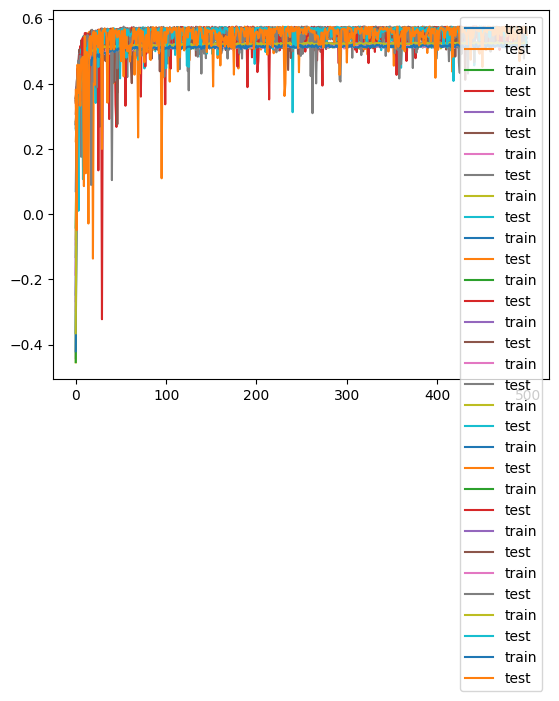

In [ ]:
# Keras SGD for the best regression model
model_type = 'Linear'
normalize = True
test_size = 0.4
seed = 11

min_hidden = 12
max_hidden = 16
hidden_step = 2
min_lr = 0.008
max_lr = 0.012
lr_step = 0.001

run_keras_lin(lin_df, model_type, normalize, min_hidden, max_hidden, hidden_step, min_lr, max_lr, lr_step, test_size, seed, no_exp)

learn_rate: 0.008 and number of hidden nodes: 14 gives the best r2: 0.572698

* R2 history of 1 hidden layer
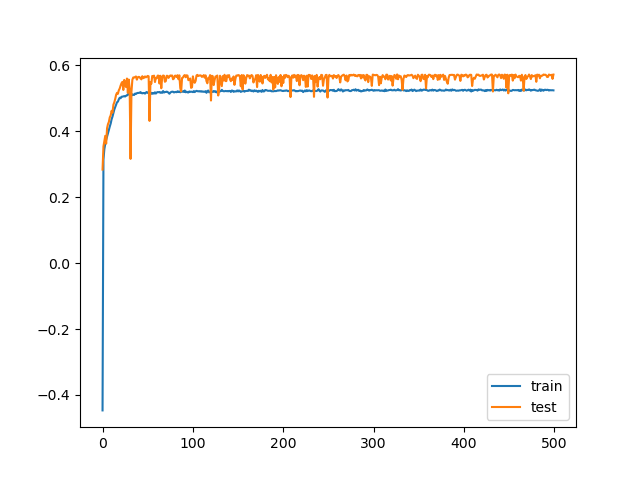
* R2 hisotry of 2 hidden layers
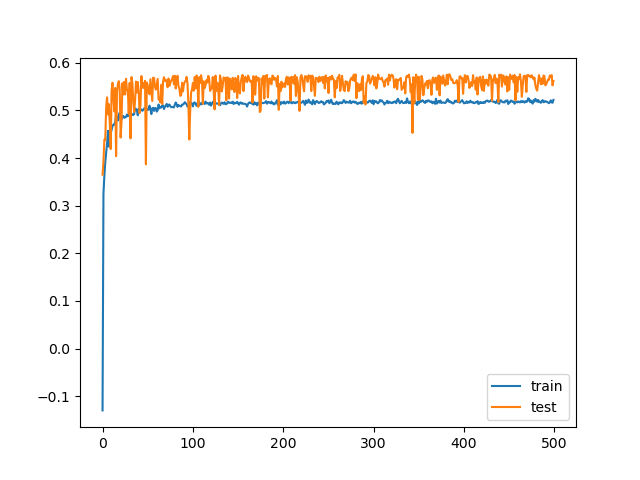

## SGD Keras Classification

* First activation function: **Rectified Linear Unit**: in order to reduce any heavy processing.
* Second, ... activation functions: **Sigmoid**: makes better performance on binary classification.

learning rate: 0.07
hidden node: 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


mean of Accuracy : 0.8163
mean of Accuracy with 2 hidden layers : 0.8049
hidden node: 12


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


mean of Accuracy : 0.8061
mean of Accuracy with 2 hidden layers : 0.8103
learning rate: 0.09000000000000001
hidden node: 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


mean of Accuracy : 0.8085
mean of Accuracy with 2 hidden layers : 0.8115
hidden node: 12


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


mean of Accuracy : 0.8049
mean of Accuracy with 2 hidden layers : 0.8145
learn_rate: 0.09000000000000001 and number of hidden nodes: 12 gives the best acc with 2 hidden layers: 0.814482


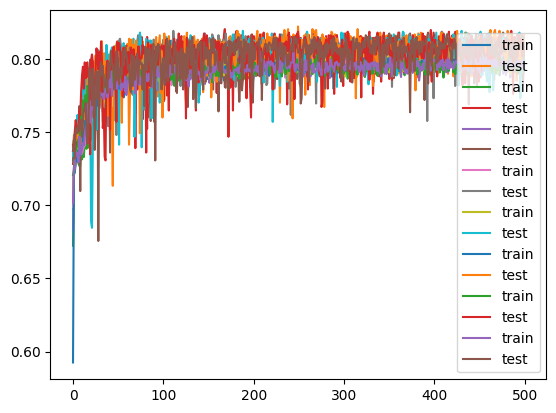

In [ ]:
# Keras SGD for the best classification model
model_type = 'Logistic'
normalize = False
test_size = 0.4
seed = 21

min_hidden = 10
max_hidden = 14
hidden_step = 2
min_lr = 0.07
max_lr = 0.11
lr_step = 0.02

run_keras_log(df, model_type, normalize, min_hidden, max_hidden, hidden_step, min_lr, max_lr, lr_step, test_size, seed, no_exp)

* Accuracy history of 1 hidden layer
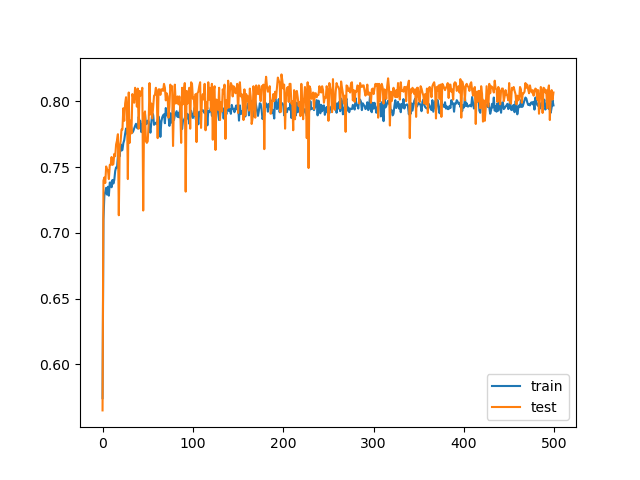
* Accuracy hisotry of 2 hidden layers
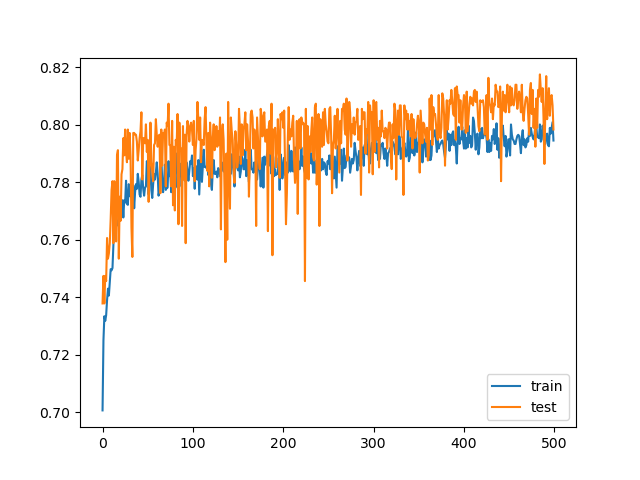

learn_rate: 0.09000000000000001 and number of hidden nodes: 12 gives the best acc with 2 hidden layers: 0.814482

## Caveats

- The **best R² scores** from the **MLP regression** model was **0.5827** and from the **Keras regression** model was **0.5724.** The evaluation scores from both models are under 0.6, which means the independent variables in both models contribute to **less than 60%** of variation in the response variables. The **best accuracy scores** from the **MLP classification** model was **0.7828** and from the **Keras classification** model was **0.8145**, which shows that the explanatory variables give an accuracy of **about 80%** in classifying true positives and true negatives. This suggests that although the models’ scores are adequate for them to be used as a reliable method for predicting and classifying abalones, which is ultimately the goal of the project, there is still room for improvement.
- In order to improve the models, as suggested by the UCI Machine Learning Repository [1], “Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.” From the further research, we can concatenate the new dataset into the given dataset, which can increase the R² score. Additionally, during the data cleaning phase, we could use Z-score or IQR to detect the outliers. We can drop the outliers for the explanatory features to have increased correlation coefficients with the response variable. Cross-validation techniques is also a potential area of exploration to improve the models’ performance.
- Finally, due to the limited memory capacity, there were only 2 experiments performed. This will not critically affect the result but the results could be more accurate.

[1] UCI Machine Learning Repository: Abalone Data Set (1995). Retrieved from: https://archive.ics.uci.edu/ml/datasets/abalone
